# Model Accuracy and hyperparameter tuning
- ## cross validation
- ## grid search

In [3]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

# algo
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [4]:
df = pd.read_csv('../datasets/diamond_pricing.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [5]:
X = df[['Paleonium','Pressure']]
scaler = StandardScaler()
x = scaler.fit_transform(X)
y = df['Price']

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2)

In [7]:
m1 = LinearRegression()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest) * 100

11.053792291497523

In [8]:
m2 = DecisionTreeRegressor()
m2.fit(xtrain,ytrain)
m2.score(xtest,ytest) * 100

95.64263713444576

In [9]:
m3 = KNeighborsRegressor()
m3.fit(xtrain,ytrain)
m3.score(xtest,ytest) * 100

97.24013408038547

In [10]:
m4 = RandomForestRegressor()
m4.fit(xtrain,ytrain)
m4.score(xtest,ytest) * 100

97.77124990166305

In [11]:
m4 = SVR()
m4.fit(xtrain,ytrain)
m4.score(xtest,ytest) * 100

10.226992539131508

## cross validation 
- gives us average accuracy of the model. so that we can confirm the model works in all situations

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
data = []

In [14]:
scores = cross_val_score(LinearRegression(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'linear',
    'score':scores.mean()
})

6.944516875273066 and [0.10185676 0.02858498 0.10733973 0.0180146  0.09142978]


In [15]:
scores = cross_val_score(DecisionTreeRegressor(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'decision tree',
    'score':scores.mean()
})

96.09245495673063 and [0.96017433 0.9609857  0.97475838 0.96029593 0.9484084 ]


In [16]:
scores = cross_val_score(KNeighborsRegressor(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'KNeigbors',
    'score':scores.mean()
})

97.43871027528975 and [0.96693893 0.97410387 0.9757381  0.98212806 0.97302657]


In [17]:
scores = cross_val_score(RandomForestRegressor(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'random forest',
    'score':scores.mean()
})

98.25156416379268 and [0.98491576 0.97826637 0.98682496 0.9826009  0.97997022]


In [18]:
scores = cross_val_score(SVR(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'svr',
    'score':scores.mean()
})

8.712430813223932 and [0.06011963 0.10565255 0.10054044 0.06589522 0.1034137 ]


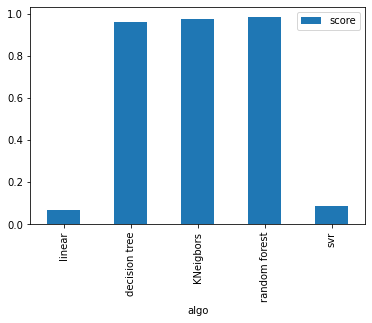

In [19]:
report = pd.DataFrame(data)
report.set_index('algo',inplace=True)
report.plot(kind='bar')
plt.show()

# Grid search
- it help us to find which property and what values are best for a model to improve accuracy

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the fore

In [22]:
params = {
    'n_estimators':[10,50,100,150,200,250,500],
    'criterion':['mse','mae'],
    'max_depth':[5,10,15,20,50],
    'max_features':['auto','sqrt','log2']
}
model = RandomForestRegressor()
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=False)

In [23]:
grid

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 500]},
             verbose=False)

In [24]:
grid.fit(x,y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 500]},
             verbose=False)

In [100]:
griddf  = pd.DataFrame(grid.cv_results_)
griddf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038000,0.003742,0.005001,0.001414,mse,5,auto,10,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.922337,0.909140,0.893206,0.908228,0.011910,195
1,0.193000,0.030099,0.012005,0.002158,mse,5,auto,50,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.933904,0.906663,0.911903,0.917490,0.011802,180
2,0.500333,0.114554,0.021334,0.004028,mse,5,auto,100,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.933649,0.914082,0.910075,0.919269,0.010299,177
3,0.735341,0.031746,0.060992,0.008032,mse,5,auto,150,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.935270,0.911768,0.911842,0.919627,0.011062,175
4,0.686999,0.004967,0.036335,0.004714,mse,5,auto,200,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.937552,0.909332,0.915989,0.920958,0.012044,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.959244,0.228417,0.027333,0.004497,mae,50,log2,100,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.981845,0.979128,0.978464,0.979812,0.001462,57
206,2.765051,0.322869,0.039008,0.006989,mae,50,log2,150,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.982412,0.979799,0.979722,0.980644,0.001251,21
207,3.862790,0.338146,0.047675,0.002351,mae,50,log2,200,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.982059,0.979111,0.979717,0.980296,0.001271,35
208,4.367622,0.253389,0.053339,0.002048,mae,50,log2,250,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.982295,0.978802,0.980308,0.980468,0.001430,26


In [101]:
griddf.sort_values(by='rank_test_score',inplace=True)

In [103]:
griddf.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
153,12.46225,0.851557,0.127,0.014165,mae,15,auto,500,"{'criterion': 'mae', 'max_depth': 15, 'max_fea...",0.981619,0.982125,0.981939,0.981894,0.000209,1


In [104]:
grid.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=500)

In [105]:
model = grid.best_estimator_

In [106]:
df['prediction'] = model.predict(x)

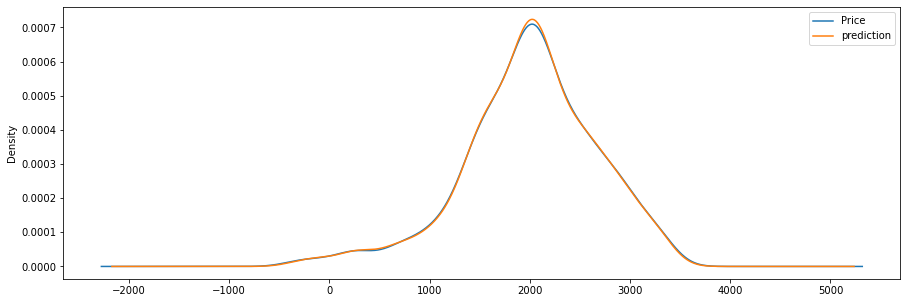

In [109]:
ax=df['Price'].plot(kind='kde',figsize=(15,5))
df['prediction'].plot(kind='kde',figsize=(15,5), ax = ax)
plt.legend()
plt.show()